# Geospatial and Gridded Data with Xarray

[Xarray](https://docs.xarray.dev/en/stable/) is a powerful tool for exploring multi-dimensional (esp. geospatial) data in a way that is efficient and robust to making coding mistakes. Pandas provided us with a way to look at tabular data, Xarray takes this further and provides a framework for N-dimensional data. One of the coolest Xarray features, is the [integration with Dask](https://docs.xarray.dev/en/stable/user-guide/dask.html). This will allow us to easily parallelize our Xarray analysis!

When using Xarray, our data will be stored in `DataArrays` which are collected together into a `DataSet`. A nice example of this is in the context of a climate model:

1) DataSet - contains all possible coordinates on the model grid and provides a list of all model variables (DataArrays)

2) DataArray - an individual model variable (e.g., sea surface temperature), the variable's coordinates on the model grid, and any additional meta data about that specific variable

In the graphic below, you can see that `temperature` and `precipitation` are both variables with coordinates `lat` and `lon`. In this simple example temperature and precip each have 3 dimensions. Not only does the DataSet store all of this information, it also relates these two variables to each other by understanding that they share coordinates `lat` and `lon`. We will use some test data to inspect this further. Any NetCDF can be read into an Xarray dataset. Many popular models facilitate reading raw output directly into Xarray.

<img src="_static/xarray.png" width="500">

In [23]:
import matplotlib.pyplot as plt
import xarray as xr

# load a sample dataset from the xarray library 
ds = xr.tutorial.load_dataset("air_temperature")

**TIP** If you realize you need to use Pandas for a particular problem, never fear! You can convert between Pandas and Xarray with a single line of code. Pandas has lots of built in tools that are great for manipulating dates and text, so you may want to use Pandas and Xarray together.

In [2]:
df = ds.to_dataframe()  # convert xarray dataset to pandas dataframe
df.to_xarray() # to xarray from dataframe

<xarray.Dataset>
Dimensions:  (lat: 25, time: 10, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-01-03T06:00:00
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Data variables:
    air      (lat, time, lon) float32 241.2 242.5 243.5 ... 296.9 296.8 297.1

### Inspecting our DataSet

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

We can see that our variable `air` has 3 dimensions (lat, lon, time) defined by coordinates of the same name. We can inspect each of those coordinates to see their ranges.

In [4]:
ds.lon

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [5]:
ds.time

<xarray.DataArray 'time' (time: 2920)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

Attributes (`attrs`) provide additional meta-data in the form of strings.

In [6]:
ds.attrs

{'Conventions': 'COARDS',
 'title': '4x daily NMC reanalysis (1948)',
 'description': 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.',
 'platform': 'Model',
 'references': 'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'}

In [7]:
ds.lon.attrs

{'standard_name': 'longitude',
 'long_name': 'Longitude',
 'units': 'degrees_east',
 'axis': 'X'}

### Selecting (Slicing) Sub-sets of Data with Labels

Xarray is great for doing reproducible science! Instead of having to remember or hard-code the order and size of your data dimensions, you can select subsets of data by their names and values. isel() is used to select by index, and sel() is used to select by dimension label and value.

In [8]:
# Select the first day
ds.air.isel(time=0)

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
        238.59999],
       [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
        239.29999],
       [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
        241.7    ],
       ...,
       [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
        294.69998],
       [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
        295.19998],
       [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
        296.6    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [9]:
# Extract data at the longitude that is nearest 220.0E
ds.air.sel(lon=220.0,method='nearest')

<xarray.DataArray 'air' (time: 2920, lat: 25)>
array([[242.5    , 241.09999, 242.2    , ..., 292.79   , 293.79   ,
        295.5    ],
       [244.29999, 242.2    , 242.09999, ..., 293.     , 294.19998,
        295.79   ],
       [246.79999, 242.39   , 243.7    , ..., 292.29   , 293.     ,
        295.     ],
       ...,
       [235.98999, 241.89   , 251.29   , ..., 296.29   , 297.69   ,
        298.29   ],
       [237.09   , 239.89   , 250.29   , ..., 296.49   , 297.88998,
        298.29   ],
       [238.89   , 238.59   , 246.59   , ..., 297.19   , 297.69   ,
        298.09   ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    lon      float32 220.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [10]:
# Extract a sub-region of data by selecting slices of latitude and longitude
ds.air.sel(lat=slice(60, 20), lon=slice(200, 240)) # keep in mind that latitude is decreasing -- the slice is from 60 to 20

<xarray.DataArray 'air' (time: 2920, lat: 17, lon: 17)>
array([[[273.69998, 273.6    , 273.79   , ..., 273.     , 275.5    ,
         276.     ],
        [274.79   , 275.19998, 275.6    , ..., 270.19998, 272.79   ,
         274.9    ],
        [275.9    , 276.9    , 276.9    , ..., 271.1    , 271.6    ,
         272.79   ],
        ...,
        [295.4    , 295.69998, 295.79   , ..., 290.19998, 290.     ,
         289.9    ],
        [297.     , 296.69998, 296.1    , ..., 290.79   , 290.9    ,
         290.69998],
        [296.6    , 296.19998, 296.4    , ..., 292.     , 292.1    ,
         291.79   ]],

       [[272.1    , 272.69998, 273.19998, ..., 270.19998, 272.79   ,
         273.6    ],
        [274.     , 274.4    , 275.1    , ..., 267.     , 270.29   ,
         272.5    ],
        [275.6    , 276.1    , 276.29   , ..., 267.79   , 269.19998,
         270.6    ],
...
        [290.88998, 291.49   , 293.19   , ..., 291.69   , 291.38998,
         290.79   ],
        [291.59   , 291.69   , 293.59   , ..., 292.79   , 292.59   ,
         292.59   ],
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.59   ,
         295.09   ]],

       [[272.59   , 271.99   , 272.19   , ..., 274.19   , 275.38998,
         273.88998],
        [274.29   , 274.49   , 275.59   , ..., 269.38998, 272.88998,
         274.69   ],
        [276.79   , 277.49   , 277.99   , ..., 264.59   , 266.88998,
         269.69   ],
        ...,
        [291.49   , 291.38998, 292.38998, ..., 291.59   , 291.19   ,
         290.99   ],
        [292.88998, 292.09   , 292.99   , ..., 293.49   , 292.88998,
         292.88998],
        [293.79   , 293.69   , 295.09   , ..., 295.38998, 294.79   ,
         294.79   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 60.0 57.5 55.0 52.5 50.0 ... 30.0 27.5 25.0 22.5 20.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 232.5 235.0 237.5 240.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Interpolating (or Resampling) Data

In [11]:
# interpolate the air temperature to a new longitude and latitude 
ds.air.interp(lon=220.7,lat=42.1)

<xarray.DataArray 'air' (time: 2920)>
array([285.78610737, 285.4166855 , 284.80703912, ..., 286.60918926,
       285.7442375 , 285.62022994])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
    lon      float64 220.7
    lat      float64 42.1
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [15]:
import numpy as np
# interpolate to a particular set of longitudes and latitudes (increase the resolution)
new_lats = np.arange(ds.lat.min(), ds.lat.max(), 0.1) # our existing latitudes are every 0.5 deg, lets make that 0.1
new_lons = np.arange(ds.lon.min(), ds.lon.max(), 0.5) # our existing longitudes are every 2.5 deg, lets make that 0.5

ds.air.interp(lat=new_lats, lon=new_lons, method='linear') # let's do linear interpolation

<xarray.DataArray 'air' (time: 2920, lat: 600, lon: 260)>
array([[[296.29000854, 296.39000854, 296.49000854, ..., 296.71400757,
         296.67600708, 296.63800659],
        [296.27440796, 296.37280786, 296.47120776, ..., 296.67024683,
         296.62816626, 296.58608569],
        [296.25880737, 296.35560718, 296.45240698, ..., 296.62648608,
         296.58032544, 296.53416479],
        ...,
        [241.51199574, 241.75759659, 242.00319744, ..., 236.75919532,
         237.4007937 , 238.04239209],
        [241.40799611, 241.65839688, 241.90879765, ..., 236.75279566,
         237.38719397, 238.02159229],
        [241.30399647, 241.55919717, 241.81439787, ..., 236.746396  ,
         237.37359424, 238.00079248]],

       [[296.29000854, 296.47200317, 296.6539978 , ..., 296.47999878,
         296.52000122, 296.56000366],
        [296.28640747, 296.46512231, 296.64383716, ..., 296.43439892,
         296.46960132, 296.50480371],
        [296.2828064 , 296.45824145, 296.63367651, ..., 296.38879907,
         296.41920141, 296.44960376],
...
        [246.28199391, 246.09159381, 245.9011937 , ..., 244.17799149,
         244.36199209, 244.54599269],
        [246.11799366, 245.92439361, 245.73079356, ..., 244.22199149,
         244.39799209, 244.57399269],
        [245.95399342, 245.75719341, 245.56039341, ..., 244.26599149,
         244.43399209, 244.60199269]],

       [[297.69000244, 297.77000122, 297.85      , ..., 295.99000244,
         295.89000244, 295.79000244],
        [297.6260022 , 297.70920093, 297.79239966, ..., 295.97000244,
         295.87000244, 295.77000244],
        [297.56200196, 297.64840064, 297.73479932, ..., 295.95000244,
         295.85000244, 295.75000244],
        ...,
        [245.6659966 , 245.51079594, 245.35559527, ..., 241.51879137,
         241.60519176, 241.69159216],
        [245.47399647, 245.31719584, 245.1603952 , ..., 241.54919139,
         241.62679186, 241.70439233],
        [245.28199635, 245.12359573, 244.96519512, ..., 241.57959141,
         241.64839196, 241.7171925 ]]])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float64 15.0 15.1 15.2 15.3 15.4 ... 74.5 74.6 74.7 74.8 74.9
  * lon      (lon) float64 200.0 200.5 201.0 201.5 ... 328.0 328.5 329.0 329.5
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

**TIP** xarray also has a function called `interp_like` which allows you to interpolate one DataArray to the coordinates of another DataArray.

### Plotting in Xarray (so easy!)

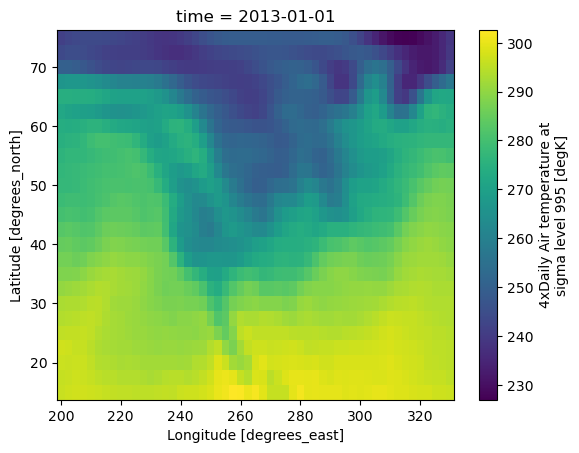

In [12]:
ds.air.isel(time=0).plot()

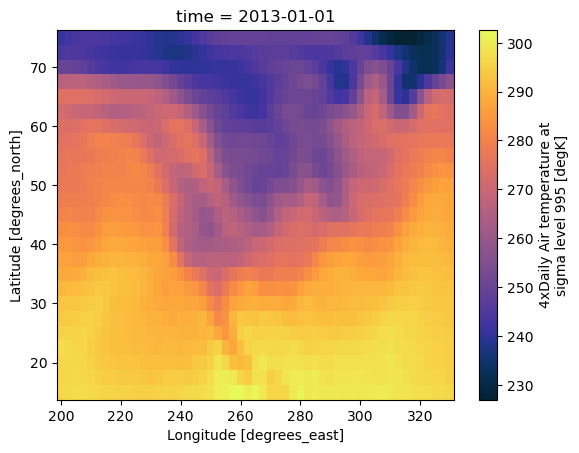

In [13]:
import cmocean.cm as cmo

# Let's use a non-default colormap
ds.air.isel(time=0).plot(cmap=cmo.thermal)

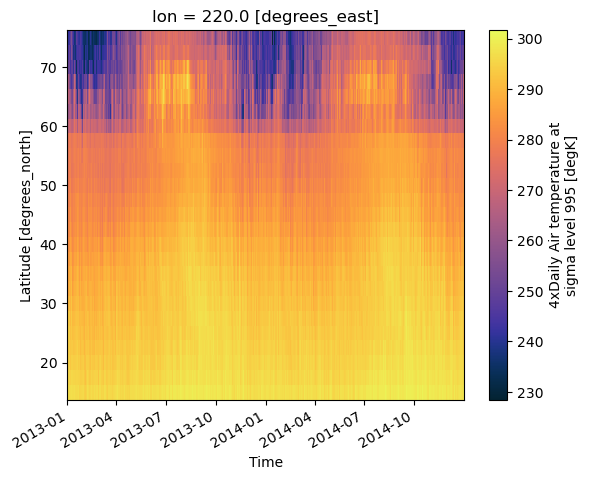

In [14]:
ds.air.sel(lon=220.0,method='nearest').plot(y='lat',x='time',cmap=cmo.thermal)

### Statistics in Xarray

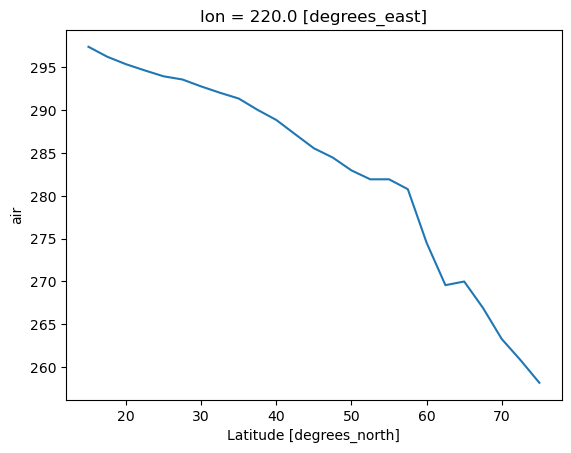

In [15]:
ds.air.sel(lon=220.0,method='nearest').mean(dim='time').plot()

In [16]:
del ds

## A More Exciting Xarray Example

Let's look at a more interesting and realistic example:

In [17]:
import xarray as xr
ds = xr.open_dataset('TPOSE6_Daily_2012_surface.nc') 

What about something harder? Gradients? Integrals? ... Enter `xgcm`.

### Calculate Divergence with xgcm

[xgcm](https://xgcm.readthedocs.io/en/latest/index.html) is a Python package that is built around Xarray. With it you create a `Grid` object which can then be used to perform more complicated mathematical operations, while remaining aware of complex grid geometries. The `Grid` is aware of the different coordinates and their relationships to each other in space. This can be really useful for model output or observations where not all variables are on the same points in space. 

In [18]:
import xgcm 

# create the grid object from our dataset
grid = xgcm.Grid(ds, periodic=['X','Y'])
grid

<xgcm.Grid>
Y Axis (periodic, boundary=None):
  * center   YC --> outer
  * outer    YG --> center
X Axis (periodic, boundary=None):
  * center   XC --> outer
  * outer    XG --> center
Z Axis (not periodic, boundary=None):
  * center   Z
T Axis (not periodic, boundary=None):
  * center   time

In [19]:
# inspect some of our variables 
ds.UVEL # zonal velocity

<xarray.DataArray 'UVEL' (time: 366, Z: 1, YC: 84, XG: 241)>
[7409304 values with dtype=float32]
Coordinates: (12/13)
    iter     (time) int64 ...
  * time     (time) timedelta64[ns] 00:01:12 00:02:24 ... 01:10:48 01:12:00
  * YC       (YC) float64 -3.917 -3.75 -3.583 -3.417 ... 9.417 9.583 9.75 9.917
  * XG       (XG) float64 210.0 210.2 210.3 210.5 ... 249.5 249.7 249.8 250.0
  * Z        (Z) float64 -1.0
    dyG      (YC, XG) float32 ...
    ...       ...
    rAw      (YC, XG) float32 ...
    drF      (Z) float32 ...
    PHrefC   (Z) float32 ...
    hFacW    (Z, YC, XG) float32 ...
    maskW    (Z, YC, XG) bool ...
    rhoRef   (Z) float32 ...
Attributes:
    standard_name:  UVEL
    long_name:      Zonal Component of Velocity (m/s)
    units:          m/s
    mate:           VVEL

In [20]:
ds.VVEL # meridional velocity

<xarray.DataArray 'VVEL' (time: 366, Z: 1, YG: 85, XC: 240)>
[7466400 values with dtype=float32]
Coordinates: (12/13)
    iter     (time) int64 ...
  * time     (time) timedelta64[ns] 00:01:12 00:02:24 ... 01:10:48 01:12:00
  * Z        (Z) float64 -1.0
    drF      (Z) float32 ...
    PHrefC   (Z) float32 ...
    rhoRef   (Z) float32 ...
    ...       ...
  * YG       (YG) float64 -4.0 -3.833 -3.667 -3.5 ... 9.5 9.667 9.833 10.0
    dxG      (YG, XC) float32 ...
    dyC      (YG, XC) float32 ...
    rAs      (YG, XC) float32 ...
    hFacS    (Z, YG, XC) float32 ...
    maskS    (Z, YG, XC) bool ...
Attributes:
    standard_name:  VVEL
    long_name:      Meridional Component of Velocity (m/s)
    units:          m/s
    mate:           UVEL

We can see that zonal and meridional velocity are computed on different grid points (XG, YC) v (XC, YG). This is not uncommon, but it means we can't just add/subtract/multiply the velocities because they are not located at the same points in space. How would we handle this without xgcm?

In [21]:
# interpolate zonal velocity to XC 

We would have to do this for meridional velocity too.

In [22]:
# interpolate meridional velocity to YC

We will have to decide how to handle the boundaries and implement that as well, otherwise these new variables will have different sizes... if we switch to a model or data format where the names of coordinates are slightly different, we will have to rewrite all of our code. Instead we can use our Grid object. If, in the future, the naming/structure of the grid changes then we will update the grid to reflect the correct relationships.

In [23]:
# interpolate U along the X axis: this will interpolate XG to the other X cordinate XC
U = grid.interp(ds.UVEL,'X')
# interpolate V along the Y axis: this will interpolate YG to the other Y cordinate YC
V = grid.interp(ds.VVEL,'Y')

display(U.dims)
display(V.dims)

('time', 'Z', 'YC', 'XC')

('time', 'Z', 'YC', 'XC')

Even better, the Grid object will automatically handle the interpolation for us. Further reducing the complexity of the code and the opportunities for making mistakes.

In [24]:
# Let's say we don't do the interpolations, we compute the quantities of interest directly on their original coordinates.
u_transport = ds.UVEL * ds.dyG * ds.hFacW * ds.drF
v_transport = ds.VVEL * ds.dxG * ds.hFacS * ds.drF
display(u_transport.dims)
display(v_transport.dims)

# The Grid object will automatically handle the coordinate transformations for us!
div_uv = (grid.diff(u_transport, 'X') + grid.diff(v_transport, 'Y')) / ds.rA  # calculate the divergence of the flow
display(div_uv.dims)

('time', 'Z', 'YC', 'XG')

('time', 'Z', 'YG', 'XC')

('time', 'Z', 'YC', 'XC')

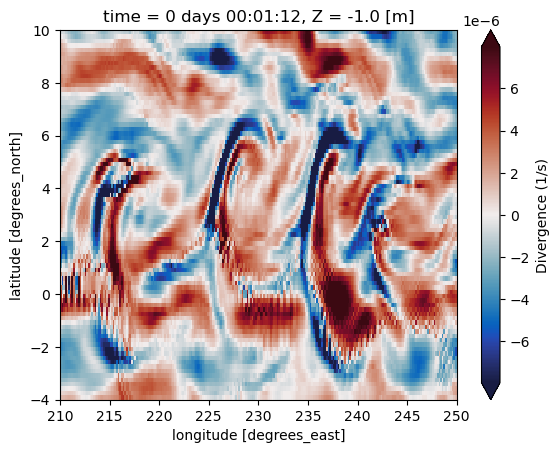

In [25]:
import cmocean.cm as cmo

# plot divergence at the surface
div_uv.isel(time=0,Z=0).plot(cmap=cmo.balance, robust=True,  
                             cbar_kwargs={'label': 'Divergence (1/s)'})

The cell above shows that we can take the divergence of the flow, while accounting for the grid geometry, in only 3 lines of code! This framework is robust to making mistakes due to coding errors or misunderstanding of the grid itself. For example:

In [26]:
# multiply ds.VVEL by ds.dxC instead of ds.dxG and see what happens
v_transport = ds.VVEL * ds.dxC * ds.hFacS * ds.drF
print(v_transport)

Xarray will not blindly combine variables of the same size when it knows they are not on the same points in space. The result here is a nonsensical thing with two X dimensions, and you will fail to analyze/plot the results because of this, forcing you to see your error. That being said, nothing is fool-proof. When we use Xarray and xgcm we cannot prevent mistakes entirely. Instead we aim to spend more time on errors such as "our question is not formulated properly" rather than "the third dimension of my data isn't the size I expected it to be, which of my indices was wrong?".

### EOF decomposition (a.k.a. PCA) with xeofs

Here we will show a brief tutorial on a [package called `xeofs`](https://xeofs.readthedocs.io/en/latest/content/user_guide/quickstart.html) which computes Empirical Orthogonal Functions (EOFs) over Xarray DataArrays. EOF analysis is also sometimes called modal decomposition or PCA. We do not expect everyone to know the underlying mathematical principles. Perhaps you never need this, perhaps you use it all of the time already, perhaps you will learn it in the future. Because it is such a common analysis tool in climate and geosciences, we will spend about 10 minutes on it here. 

If you are not interested in using EOFs, this can serve as an example of one of the _many_ software packages for data analysis with Xarray.

In [2]:
import xarray as xr
import xeofs as xe

# we will use the same air temperature data set
t2m = xr.tutorial.open_dataset("air_temperature")

# choose a model to use. this will dictate what kind of EOF analysis we will perform. 
# we want to weight our data by the cosine of latitude, so we will use the EOF model with coslat weighting.
model = xe.single.EOF(use_coslat=True)

# fit the model to the data (i.e., compute the EOFs), by default this will give us 2 EOFs
model.fit(t2m, dim="time")
model

In [3]:
# we can look at how much variance each EOF explains
model.explained_variance_ratio()

<xarray.DataArray 'explained_variance_ratio' (mode: 2)> Size: 16B
array([0.78049922, 0.03021367])
Coordinates:
  * mode     (mode) int64 16B 1 2
Attributes: (12/15)
    model:          EOF analysis
    software:       xeofs
    version:        3.0.4
    date:           2025-08-07 12:57:14
    n_modes:        2
    center:         True
    ...             ...
    sample_name:    sample
    feature_name:   feature
    random_state:   None
    compute:        True
    solver:         auto
    solver_kwargs:  {}

This shows us that the first EOF explains 78% of the variance while the second one only explains 3%...What if we ask for more modes?

In [7]:
model = xe.single.EOF(use_coslat=True,n_modes=4)
model.fit(t2m, dim="time")  # fit the model to the data and return 4 EOFs
model.explained_variance_ratio()

<xarray.DataArray 'explained_variance_ratio' (mode: 4)> Size: 32B
array([0.78049922, 0.03021367, 0.02367857, 0.02009094])
Coordinates:
  * mode     (mode) int64 32B 1 2 3 4
Attributes: (12/15)
    model:          EOF analysis
    software:       xeofs
    version:        3.0.4
    date:           2025-08-07 13:00:26
    n_modes:        4
    center:         True
    ...             ...
    sample_name:    sample
    feature_name:   feature
    random_state:   None
    compute:        True
    solver:         auto
    solver_kwargs:  {}

As we can see the significance of the modes is just decreasing. Now lets examine the spatial patterns in the EOFs themselves. We do this by grabbing the `components`.

In [8]:
components = model.components() # we should see our 4 EOFs (we have 4 principal components)
components

<xarray.Dataset> Size: 43kB
Dimensions:  (lat: 25, lon: 53, mode: 4)
Coordinates:
  * lat      (lat) float32 100B 15.0 17.5 20.0 22.5 25.0 ... 67.5 70.0 72.5 75.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * mode     (mode) int64 32B 1 2 3 4
Data variables:
    air      (mode, lat, lon) float64 42kB 0.003083 0.002989 ... 0.0004281

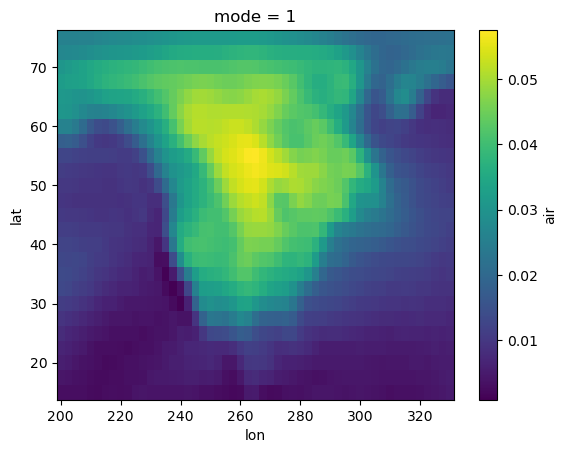

In [11]:
# Lets plot the first EOF
components["air"].sel(mode=1).plot()

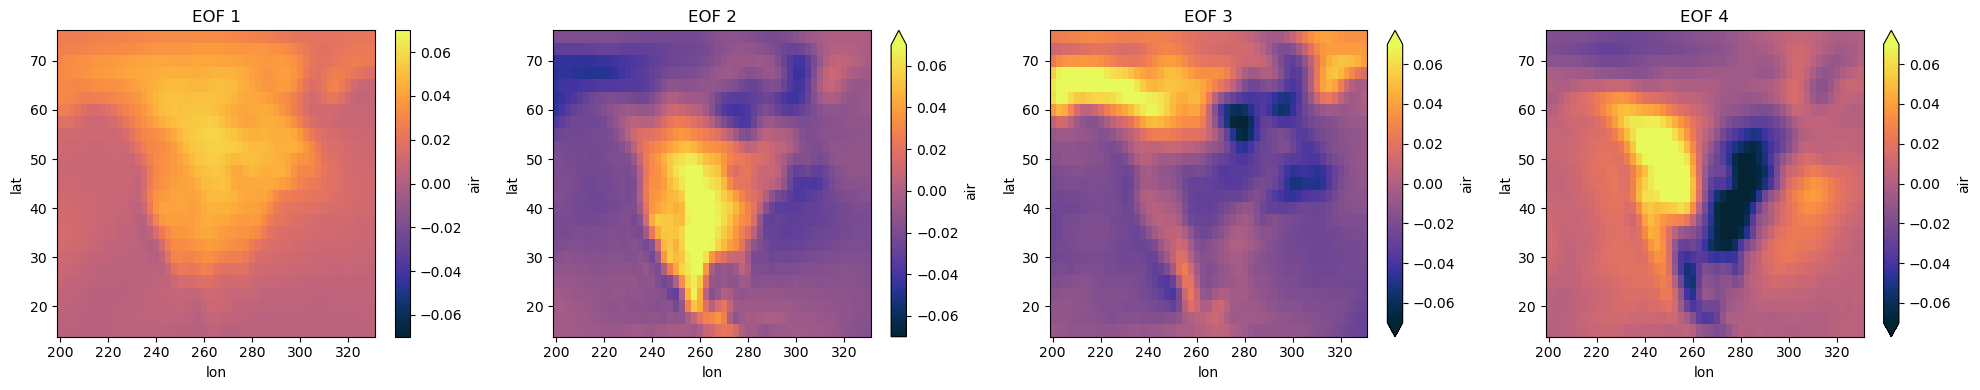

In [22]:
import matplotlib.pyplot as plt
import cmocean.cm as cmo

# Maybe we want to look at all EOFs
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
for i in range(4):
    components["air"].sel(mode=i+1).plot(ax=ax[i], cmap=cmo.thermal, vmin=-0.07, vmax=0.07)
    ax[i].set_title(f"EOF {i+1}")

plt.tight_layout()

Keep in mind that is still up to you, the scientist, to decide do these results look reasonable? Did you take the EOF in the appropriate dimension? What are meaningful units for your colorbars? Explore the tutorials on the [xeofs docs](https://xeofs.readthedocs.io/en/latest/content/user_guide/auto_examples/index.html) to see examples for significance testing, multivariate EOF, Hilbert EOF, sparse EOF, and much much more.

**NOTE** Take a look at all of the cool [Xarray related projects](https://docs.xarray.dev/en/stable/user-guide/ecosystem.html)! Most of them are for geoscience applications. There is also an extensive set of [Xarray tutorials](https://tutorial.xarray.dev/overview/get-started.html).